# this is my note for starting Image Processing 


### In image processing, identifying the dominant colors within an image is a common task that can be achieved using machine learning techniques such as K-Means clustering. K-Means is an unsupervised learning algorithm that groups data points into a predefined number of clusters (K) based on their similarity.
>   When applied to an image, the pixel values (often in RGB or another color space) are treated as data points. The algorithm iteratively assigns each pixel to the nearest cluster centroid and updates the centroids until convergence. The resulting centroids represent the dominant colors in the image, as they are the average colors of the clusters formed. By analyzing the distribution of pixels across these clusters, the most prominent colors can be identified. This approach is widely used in applications like image compression, color-based image segmentation, and visual aesthetics analysis. The choice of K determines the number of dominant colors extracted, allowing flexibility depending on the desired level of detail.

<div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 10px;">
  <h1 style="color: green;">- Dominant Colors</h1>


</div>
<div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 10px;">
  <h4 style="color:rgb(86, 143, 143) ;">- Amirreza zare <br/> - 3/7/2025 </h4>
</div>

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_cluster = 5
img = cv2.imread("../data/images/felfel-dolme.jpg")
flat_img = img.reshape((-1, 3))

kmeans = KMeans(n_clusters=n_cluster)
kmeans.fit(flat_img)

dominant_colors = np.array(kmeans.cluster_centers_, dtype="uint")
labels = kmeans.labels_

print(dominant_colors)
print(labels)

[[ 12 142  80]
 [  9 183 246]
 [ 13  35 127]
 [ 36  77 208]
 [  2  62  16]]
[3 3 3 ... 4 4 4]


In [2]:
np.unique(labels , return_counts =True )

(array([0, 1, 2, 3, 4]),
 array([131384, 324957,  91605, 150286, 250248], dtype=int64))

In [3]:
np.bincount(labels)

array([131384, 324957,  91605, 150286, 250248], dtype=int64)

In [4]:
perecentages = np.bincount(labels) / len(flat_img)
perecentages

array([0.13852058, 0.34260817, 0.09658085, 0.15844931, 0.26384109])

In [5]:
p_and_c = zip(perecentages , dominant_colors)
p_and_c = sorted(p_and_c, reverse=True)

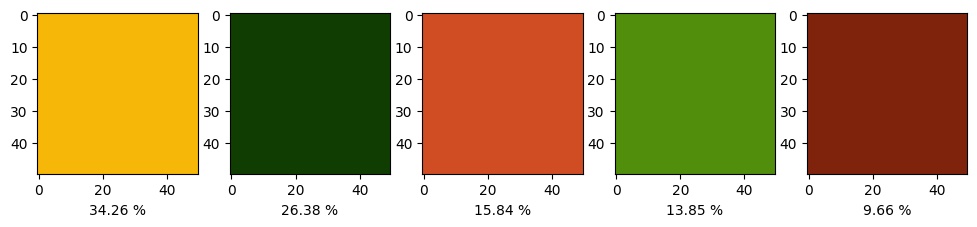

In [7]:

block = np.ones((50,50,3), dtype='uint')
plt.figure(figsize=[12, 8])
for i in range(n_cluster):
    plt.subplot(1,n_cluster, i+1)
    block[:] = p_and_c[i][1][::-1]
    plt.imshow(block)
    plt.xlabel(f"{round(p_and_c[i][0]*100,2)} %")

In [19]:
# FREE UP MEMORY AND RESOURCES
import gc

gc.collect()
%reset -f

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('../data/videos/blue-track.mp4')

while True : 
    ret , frame = cap.read()
    if not ret :
        break
    hsv = cv2.cvtColor(frame , cv2.COLOR_BGR2HSV)
    
    lower = np.array([100 ,50,50])
    upper = np.array([130 ,255,255])
    
    mask = cv2.inRange(hsv, lower, upper)
    contours , _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    center , radius = cv2.minEnclosingCircle(contours[0])
    center = (int(center[0]), int(center[1]))
    radius = int(radius)
    cv2.circle(frame, center, radius, (0, 0, 255), 2)
    cv2.imshow('frame', frame)

    key = cv2.waitKey(5) & 0xFF
    if key == 27 :
        break
cv2.destroyAllWindows()
cap.release()

In [2]:
# FREE UP MEMORY AND RESOURCES
import gc

gc.collect()
%reset -f

In [5]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_blue = np.array([100,50,50])
    upper_blue = np.array([130,255,255])
    
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()